In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df_clients = pd.read_csv("../Data/Raw/df_final_experiment_clients.txt")
df_demo = pd.read_csv("../Data/Raw/df_final_demo.txt")
df_web1 = pd.read_csv("../Data/Raw/df_final_web_data_pt_1.txt")
df_web2 = pd.read_csv("../Data/Raw/df_final_web_data_pt_2.txt")

df_demo_control = pd.read_csv("../Data/Clean/demo_control.csv")

## **Data Clean - Demo Control** ##

In [5]:
df_demo_control.nunique().sort_values(ascending=False)
df_demo_control.shape

(23532, 11)

- Numerical: Maybe 'balance' - but this could also be categorical
- Categorical: almost all of the columns should be categorical, which makes sense because it's demographic data

In [7]:
#check for missing values
df_demo_control.isnull().sum().sort_values(ascending=False)

clnt_age            6
clnt_tenure_yr      5
clnt_tenure_mnth    5
gendr               5
num_accts           5
bal                 5
calls_6_mnth        5
logons_6_mnth       5
Unnamed: 0          0
client_id           0
Variation           0
dtype: int64

In [8]:
#see rows with missing values
df_demo_control[df_demo_control.isnull().any(axis=1)]

,Unnamed: 0,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
1937,4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
3802,8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
4383,9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0,Control
13188,28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
16444,35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
21525,46076,8611797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control


In [9]:
#drop rows missing values
df_cleaned = df_demo_control.dropna()

## **Demographic Data - Client Tenure** ##

In [11]:
#How long have the control clients had accounts?

disp_tenure_months = df_cleaned['clnt_tenure_mnth'].describe()
disp_tenure_years = df_cleaned['clnt_tenure_yr'].describe()
mode_tenure_years = df_cleaned['clnt_tenure_yr'].mode()[0]
mode_tenure_months = df_cleaned['clnt_tenure_mnth'].mode()[0]

disp_tenure_months, disp_tenure_years, mode_tenure_years, mode_tenure_months

(count    23526.000000
 mean       151.062102
 std         82.127663
 min         33.000000
 25%         82.000000
 50%        137.000000
 75%        192.000000
 max        669.000000
 Name: clnt_tenure_mnth, dtype: float64,
 count    23526.000000
 mean        12.087860
 std          6.877626
 min          2.000000
 25%          6.000000
 50%         11.000000
 75%         16.000000
 max         55.000000
 Name: clnt_tenure_yr, dtype: float64,
 6.0,
 58.0)

In [12]:
#Checking for invalid tenure

df_invalid_tenure = df_cleaned[df_cleaned["clnt_tenure_yr"] > df_cleaned["clnt_age"]]

df_invalid_tenure

,Unnamed: 0,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
57,108,7449147,27.0,330.0,26.5,F,2.0,215247.66,3.0,6.0,Control
1113,2397,2256055,32.0,386.0,27.0,F,2.0,32657.30,0.0,3.0,Control
1120,2410,9489571,27.0,327.0,24.5,M,3.0,151050.30,6.0,9.0,Control
1157,2499,4531392,21.0,255.0,20.0,M,3.0,31215.12,2.0,5.0,Control
1372,2953,7524332,23.0,282.0,20.0,M,3.0,107459.11,4.0,7.0,Control
...,...,...,...,...,...,...,...,...,...,...,...
22001,47137,6409786,21.0,255.0,20.5,F,2.0,39788.38,4.0,7.0,Control
22143,47421,8743848,24.0,294.0,21.5,U,2.0,38075.45,6.0,9.0,Control
23078,49544,2886322,24.0,288.0,22.0,F,2.0,27345.07,6.0,9.0,Control
23399,50195,9660581,24.0,297.0,23.5,F,3.0,63149.31,5.0,8.0,Control


**Analysis**: There are 145 cases where the client's tenure is longer than their age - potentially a source of error unless they inherited the account from a family member or spouse?

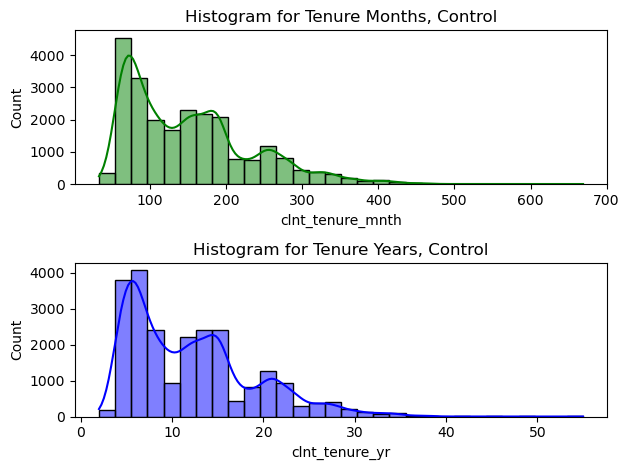

In [14]:
fig, axes = plt.subplots(2,1, dpi = 100)
sns.histplot(df_cleaned['clnt_tenure_mnth'], kde=True, bins=30, color="green", ax=axes[0])
axes[0].set_title("Histogram for Tenure Months, Control")
sns.histplot(df_cleaned['clnt_tenure_yr'], kde=True, bins=30, color="blue", ax=axes[1])
axes[1].set_title("Histogram for Tenure Years, Control")
plt.tight_layout()
plt.show()

**Analysis:** 75% of Vanguard's account holders in this control group are long-term (6+ years), with 25% of clients holding accounts for 16+ years. There are few new clients included in this dataset, unclear if that was intentional for the control group?

The distribution is multimodal, suggesting that the control group might have been selected based on diff groups of customers, e.g. New customers with tenure 5–10 years. Mid-tenured customers 15–20 years. Long-term customers 25+ years.

## **Demographic Data - Client Age** ##

In [17]:
#How long have the control clients had accounts?

disp_age = df_cleaned['clnt_age'].describe()
mode_age = df_cleaned['clnt_age'].mode()[0]

disp_age, mode_age

(count    23526.000000
 mean        47.498427
 std         15.521781
 min         17.000000
 25%         33.500000
 50%         48.500000
 75%         60.000000
 max         96.000000
 Name: clnt_age, dtype: float64,
 58.5)

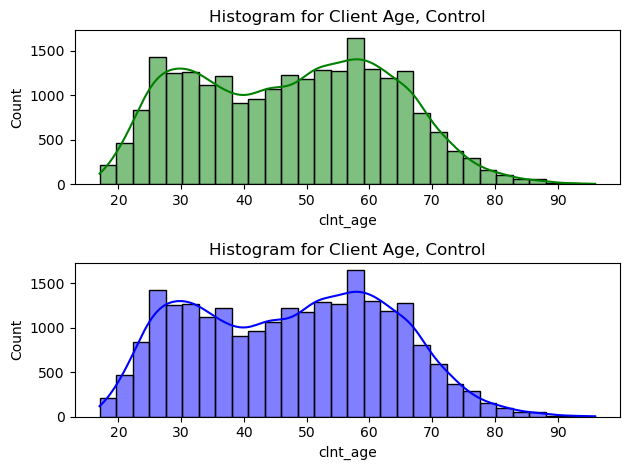

In [18]:
fig, axes = plt.subplots(2,1, dpi = 100)
sns.histplot(df_cleaned['clnt_age'], kde=True, bins=30, color="green", ax=axes[0])
axes[0].set_title("Histogram for Client Age, Control")
sns.histplot(df_cleaned['clnt_age'], kde=True, bins=30, color="blue", ax=axes[1])
axes[1].set_title("Histogram for Client Age, Control")
plt.tight_layout()
plt.show()

**Analysis:** The median age for the control group is 58 years old. The distribution is multimodal, suggesting that maybe the control group was selected based on two groups 18-40 and 40+.

## **Demographic Data - Gender** ##

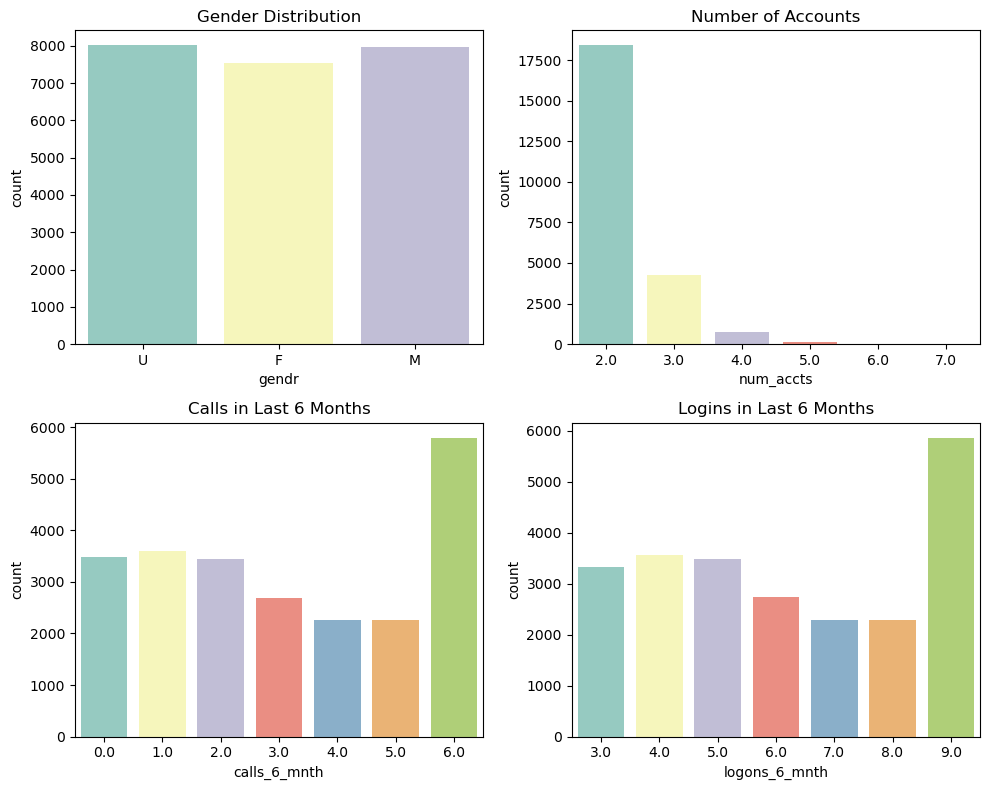

In [21]:
fig, ax = plt.subplots(2, 2, dpi=100, figsize=(10, 8))

sns.countplot(data=df_cleaned, x='gendr', palette="Set3", hue='gendr',legend= False, ax=ax[0, 0])
sns.countplot(data=df_cleaned, x='num_accts', palette="Set3", hue='num_accts',legend= False, ax=ax[0, 1])
sns.countplot(data=df_cleaned, x='calls_6_mnth', palette="Set3", hue='calls_6_mnth',legend= False, ax=ax[1, 0])
sns.countplot(data=df_cleaned, x='logons_6_mnth', palette="Set3", hue='logons_6_mnth', legend= False, ax=ax[1, 1])

ax[0, 0].set_title("Gender Distribution")
ax[0, 1].set_title("Number of Accounts")
ax[1, 0].set_title("Calls in Last 6 Months")
ax[1, 1].set_title("Logins in Last 6 Months")

plt.tight_layout()
plt.show()



**Analysis:** 
- Even distribution of M, F, and Unknown gender
- Majority of clients have 2 accounts
- Larger share of clients have 6 calls
- Larger share of clients have 9 log-ons, minimum 3 log-ons